# Company_rf

In [1]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

company = read_csv('Company_Data.csv')
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [2]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [3]:
from sklearn import preprocessing

In [4]:
label_encoder = preprocessing.LabelEncoder()
company['ShelveLoc']= label_encoder.fit_transform(company['ShelveLoc'])
company['Urban']= label_encoder.fit_transform(company['Urban']) 
company['US']= label_encoder.fit_transform(company['US']) 
company['Sales']= label_encoder.fit_transform(company['Sales']) 
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,255,138,73,11,276,120,0,42,17,1,1
1,297,111,48,16,260,83,1,65,10,1,1
2,267,113,35,10,269,80,2,59,12,1,1
3,158,117,100,4,466,97,2,55,14,1,1
4,37,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,320,138,108,17,203,128,1,33,14,1,1
396,114,139,23,3,37,120,2,55,11,0,1
397,159,162,26,12,368,159,2,40,18,1,1
398,106,100,79,7,284,95,0,50,12,1,1


In [5]:
company.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [6]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Sales        400 non-null    int64
 1   CompPrice    400 non-null    int64
 2   Income       400 non-null    int64
 3   Advertising  400 non-null    int64
 4   Population   400 non-null    int64
 5   Price        400 non-null    int64
 6   ShelveLoc    400 non-null    int32
 7   Age          400 non-null    int64
 8   Education    400 non-null    int64
 9   Urban        400 non-null    int32
 10  US           400 non-null    int32
dtypes: int32(3), int64(8)
memory usage: 29.8 KB


In [7]:
array = company.values
array

array([[255, 138,  73, ...,  17,   1,   1],
       [297, 111,  48, ...,  10,   1,   1],
       [267, 113,  35, ...,  12,   1,   1],
       ...,
       [159, 162,  26, ...,  18,   1,   1],
       [106, 100,  79, ...,  12,   1,   1],
       [262, 134,  37, ...,  16,   1,   1]], dtype=int64)

In [8]:
X = array[:,1:11]
Y = array[:,0:1]

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.2,random_state=40)

In [10]:
len(Y_train)

320

In [11]:
print(X_train.shape,X_test.shape, Y_train.shape,Y_test.shape)

(320, 10) (80, 10) (320, 1) (80, 1)


In [41]:
from sklearn.ensemble import RandomForestClassifier
rfcompany = RandomForestClassifier(n_jobs=4,oob_score=True,n_estimators=100,max_features=10,criterion="entropy",max_depth=3)
rfcompany.fit(X_train,Y_train)
rfpreds = rfcompany.predict(X_train)
rfpreds

<ipython-input-41-b808ff639a3c>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfcompany.fit(X_train,Y_train)


array([208, 243,   7, 100, 117, 142, 178, 183, 223, 210, 148, 223, 322,
       270,  34, 142,  81, 223,  48, 103, 318, 117, 243, 142, 117,  34,
       151, 221, 184, 103,  35, 183, 243, 142, 117, 148, 117, 296, 183,
       243, 243, 314, 161, 142,  63, 130, 243, 135, 179, 243,  74, 217,
       318,  74, 312, 135, 234, 135,  16, 142, 128, 243, 117, 309, 102,
       184, 273, 148, 148, 142, 243, 187, 269,  56,  70, 142, 273, 117,
        45, 142, 183, 178, 185, 184, 243,  34,  40, 103, 184, 116, 243,
       234, 103, 243, 215, 237, 223, 171,  49, 195, 243, 183, 315, 135,
       148, 243,  38, 142,  74,  34,  34, 243, 223, 103, 243, 273, 119,
       184, 223, 222, 142, 320, 142,  34, 308, 132, 178, 142, 110, 304,
        19, 210, 223, 142, 280, 332, 135, 122, 234, 184, 142,  34, 131,
        34, 243, 176,  49, 178, 184, 214, 163, 165,  34, 212, 168,  34,
       223,  34,  14, 239, 210,  38, 297, 253, 117, 128, 122,  34, 135,
       183, 318, 142, 249, 183, 117, 128, 184, 240, 243, 142, 14

In [42]:
results = cross_val_score(rfcompany, X, Y, cv=2)
results

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


array([0.   , 0.005])

In [48]:
print(results.mean())

0.0025


In [49]:
import numpy as np

In [50]:
np.mean([rfpreds==Y_train])

0.00685546875

In [51]:
rfcompany.score(X_test,Y_test)

0.0

In [43]:
rfcompany.estimators_

[DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features=10,
                        random_state=916724582),
 DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features=10,
                        random_state=186618143),
 DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features=10,
                        random_state=2099583610),
 DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features=10,
                        random_state=1039491739),
 DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features=10,
                        random_state=9249032),
 DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features=10,
                        random_state=1358037111),
 DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features=10,
                        random_state=1911252014),
 DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features=10,
                        random_state=196336116),
 Decis

In [44]:
len(rfcompany.estimators_)

100

[Text(418.5, 475.65000000000003, 'X[2] <= 6.5\nentropy = 7.397\nsamples = 211\nvalue = [0, 3, 0, 1, 1, 0, 0, 1, 0, 2, 1, 2, 4, 0\n2, 1, 1, 1, 0, 0, 1, 3, 1, 0, 3, 0, 1, 0\n0, 2, 1, 1, 0, 2, 0, 0, 1, 2, 0, 1, 0, 1\n1, 1, 2, 1, 2, 0, 1, 4, 2, 1, 4, 1, 1, 1\n3, 4, 1, 1, 2, 2, 0, 1, 2, 1, 1, 0, 2, 1\n4, 0, 0, 1, 0, 1, 2, 3, 1, 2, 0, 0, 2, 0\n0, 2, 1, 0, 2, 0, 2, 1, 0, 1, 1, 0, 0, 2\n4, 0, 0, 1, 1, 3, 0, 0, 2, 3, 2, 1, 0, 2\n1, 2, 1, 1, 1, 2, 3, 5, 2, 2, 0, 0, 1, 1\n0, 1, 1, 2, 1, 0, 2, 5, 1, 2, 3, 1, 0, 1\n1, 0, 1, 2, 1, 1, 3, 3, 2, 0, 1, 1, 0, 0\n1, 5, 1, 0, 3, 1, 0, 0, 2, 1, 1, 2, 1, 1\n0, 1, 2, 1, 1, 1, 1, 0, 0, 0, 2, 0, 1, 1\n0, 1, 4, 0, 2, 1, 1, 1, 2, 1, 1, 0, 2, 0\n1, 1, 1, 0, 1, 2, 1, 2, 0, 3, 1, 1, 2, 3\n2, 0, 1, 0, 2, 0, 1, 1, 1, 2, 0, 0, 1, 1\n1, 0, 1, 2, 2, 0, 1, 1, 2, 0, 0, 0, 0, 0\n0, 0, 1, 1, 2, 1, 0, 0, 1, 0, 3, 2, 1, 0\n1, 3, 1, 1, 0, 2, 0, 0, 1, 1, 5, 2, 3, 1\n0, 1, 1, 1, 0, 2, 2, 1, 3, 1, 0]'),
 Text(209.25, 339.75, 'X[3] <= 233.5\nentropy = 6.497\nsamples = 111\nvalue = 

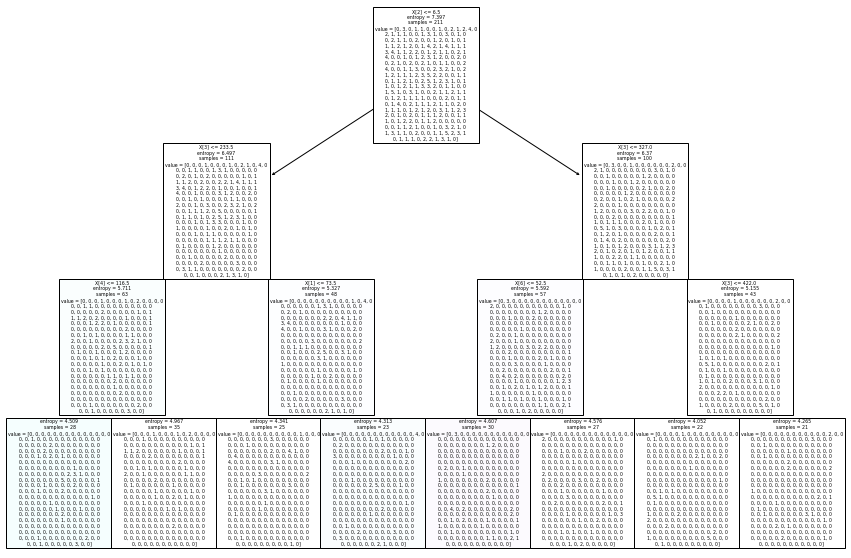

In [45]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
tree.plot_tree(rfcompany.estimators_[1],filled=True)

# frauds_rf

In [53]:
frauds = read_csv('Fraud_check.csv')
frauds

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [54]:
fraud=frauds.rename(columns={'Marital.Status':'maritalstatus','Work.Experience':'workexperience','Taxable.Income':'taxableincome','City.Population':'citypopulation'},inplace=False)

In [55]:
label_encoder = preprocessing.LabelEncoder()
fraud['Undergrad']= label_encoder.fit_transform(fraud['Undergrad'])
fraud['maritalstatus']= label_encoder.fit_transform(fraud['maritalstatus']) 
fraud['Urban']= label_encoder.fit_transform(fraud['Urban']) 
fraud

,Undergrad,maritalstatus,taxableincome,citypopulation,workexperience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [56]:
fraud.corr()

,Undergrad,maritalstatus,taxableincome,citypopulation,workexperience,Urban
Undergrad,1.000000,0.042407,-0.049232,0.079579,-0.005362,-0.000267
maritalstatus,0.042407,1.000000,-0.012944,-0.001564,-0.002213,0.064562
taxableincome,-0.049232,-0.012944,1.000000,-0.064387,-0.001818,0.070628
citypopulation,0.079579,-0.001564,-0.064387,1.000000,0.013135,-0.040098
workexperience,-0.005362,-0.002213,-0.001818,0.013135,1.000000,-0.094559
Urban,-0.000267,0.064562,0.070628,-0.040098,-0.094559,1.000000


In [57]:
fraud_df=fraud.drop(['citypopulation'],axis='columns')
fraud_df=fraud.drop(['workexperience'],axis='columns')
fraud_df

,Undergrad,maritalstatus,taxableincome,citypopulation,Urban
0,0,2,68833,50047,1
1,1,0,33700,134075,1
2,0,1,36925,160205,1
3,1,2,50190,193264,1
4,0,1,81002,27533,0
...,...,...,...,...,...
595,1,0,76340,39492,1
596,1,0,69967,55369,1
597,0,0,47334,154058,1
598,1,1,98592,180083,0


In [58]:
conditions = [
    (fraud_df['taxableincome'] <= 30000),
    (fraud_df['taxableincome'] > 30000)]

# create a list of the values we want to assign for each condition
values = ['risky','good']

# create a new column and use np.select to assign values to it using our lists as arguments
fraud_df['category'] = np.select(conditions, values)

# display updated DataFrame
fraud_df.head()

,Undergrad,maritalstatus,taxableincome,citypopulation,Urban,category
0,0,2,68833,50047,1,good
1,1,0,33700,134075,1,good
2,0,1,36925,160205,1,good
3,1,2,50190,193264,1,good
4,0,1,81002,27533,0,good


In [59]:
fraud_new=fraud_df.drop(['taxableincome'],axis='columns')
fraud_new

,Undergrad,maritalstatus,citypopulation,Urban,category
0,0,2,50047,1,good
1,1,0,134075,1,good
2,0,1,160205,1,good
3,1,2,193264,1,good
4,0,1,27533,0,good
...,...,...,...,...,...
595,1,0,39492,1,good
596,1,0,55369,1,good
597,0,0,154058,1,good
598,1,1,180083,0,good


In [60]:
x=fraud_new.iloc[:,0:4]
y=fraud_new.iloc[:,4]

In [61]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2,random_state=40)
print(x_train.shape,x_test.shape, y_train.shape,y_test.shape)

(480, 4) (120, 4) (480,) (120,)


In [66]:
from sklearn.ensemble import RandomForestClassifier
rffraud_new = RandomForestClassifier(n_jobs=4,oob_score=True,n_estimators=5,max_features=2,criterion="entropy",max_depth=4)
rffraud_new.fit(x_train,y_train)
rfpred = rffraud_new.predict(x_train)
rfpred

C:\Users\USER\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\USER\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:544: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /


array(['good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'risky', 'good', 'risky', 'good', 'good',
       'good', 'good', 'risky', 'risky', 'good', 'good', 'good', 'good',
       'risky', 'good', 'risky', 'good', 'good', 'good', 'good', 'risky',
       'good', 'good', 'risky', 'good', 'good', 'risky', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'risky', 'risky', 'good', 'risky', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'risky', 'good', 'risky', 'good', 'good',
       'good', 'good', 'risky', 'risky', 'risky', 'good', 'risky',
       'risky', 'risky', 'good', 'good', 'good', 'good', 'risky', 'good',
       'good', 'good', 'good', 'risky', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 

In [67]:
rffraud_new.score(x_test,y_test)

0.6666666666666666

In [68]:
len(rffraud_new.estimators_)

5

In [88]:
rffraud_new.estimators_

[DecisionTreeClassifier(criterion='entropy', max_features=2,
                        random_state=2099579699),
 DecisionTreeClassifier(criterion='entropy', max_features=2,
                        random_state=1382803007),
 DecisionTreeClassifier(criterion='entropy', max_features=2,
                        random_state=760230752),
 DecisionTreeClassifier(criterion='entropy', max_features=2,
                        random_state=509566843),
 DecisionTreeClassifier(criterion='entropy', max_features=2,
                        random_state=1830000577)]

[Text(220.34496670081967, 525.48, 'X[1] <= 0.5\nentropy = 0.696\nsamples = 311\nvalue = [390, 90]'),
 Text(92.6188524590164, 489.24, 'X[0] <= 0.5\nentropy = 0.6\nsamples = 94\nvalue = [117, 20]'),
 Text(44.59426229508197, 453.0, 'X[3] <= 0.5\nentropy = 0.306\nsamples = 46\nvalue = [69, 4]'),
 Text(13.721311475409836, 416.76, 'X[2] <= 79327.0\nentropy = 0.31\nsamples = 24\nvalue = [34, 2]'),
 Text(6.860655737704918, 380.52, 'entropy = 0.0\nsamples = 7\nvalue = [13, 0]'),
 Text(20.581967213114755, 380.52, 'X[2] <= 82708.5\nentropy = 0.426\nsamples = 17\nvalue = [21, 2]'),
 Text(13.721311475409836, 344.28, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(27.442622950819672, 344.28, 'X[2] <= 148370.5\nentropy = 0.267\nsamples = 16\nvalue = [21, 1]'),
 Text(20.581967213114755, 308.04, 'entropy = 0.0\nsamples = 10\nvalue = [12, 0]'),
 Text(34.30327868852459, 308.04, 'X[2] <= 153732.0\nentropy = 0.469\nsamples = 6\nvalue = [9, 1]'),
 Text(27.442622950819672, 271.8, 'entropy = 0.0\nsamples

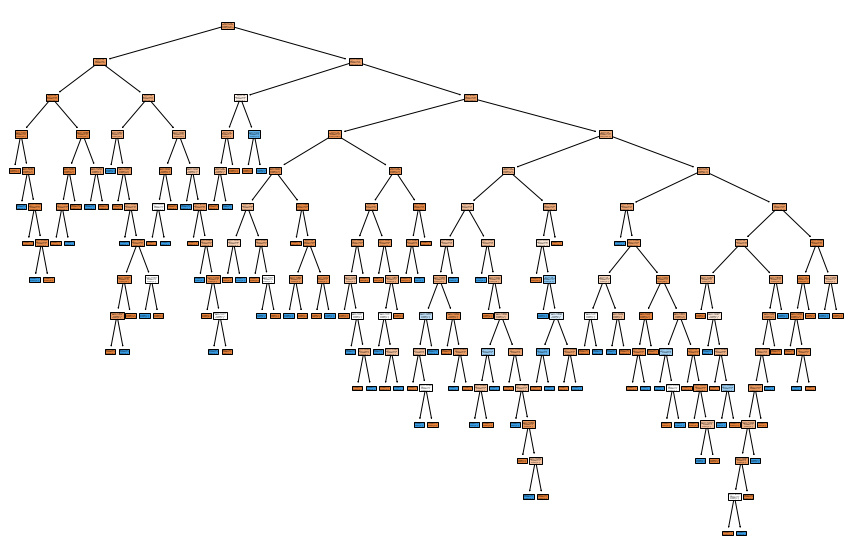

In [90]:
plt.figure(figsize=(15,10))
tree.plot_tree(rffraud_new.estimators_[3],filled=True)

In [ ]:
# other than assignment

# iris_rf

In [ ]:
# referances
#https://www.youtube.com/watch?v=SMGEmCOUBUw
#https://www.youtube.com/watch?v=kOYnlqbZ8K4

In [78]:
#!pip install pydotplus

  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24572 sha256=4a29d751a96673502aae4b6aa26e910b18b268a625c54079b0cd20f5bb6a236d
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\fe\cd\78\a7e873cc049759194f8271f780640cf96b35e5a48bef0e2f36
Successfully built pydotplus


In [111]:
#!pip install graphviz

In [145]:
import PIL
import warnings
from glob import glob
from IPython.display import display, Image
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.datasets import load_iris

In [146]:
%matplotlib inline
warnings.filterwarnings('ignore')

In [147]:
def save_decision_trees_as_png(clf,iteration,feature_name,target_name):
    file_name='Fraud_check_'+str(iteration)+'.png'
    dot_data=export_graphviz(
        clf,
        out_file=None,
        feature_names=feature_name,
        class_names=target_name,
        precision=2,
        filled=True,
    )
    graph=pydotplus.graph_from_dot_data(dot_data)
    graph.write_png(file_name)
    print('Decision Tree {} saved as png file'.format (iteration+1))

In [148]:
iris = load_iris()
feature_names=iris.feature_names
target_names=iris.target_names

In [149]:
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [150]:
target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [151]:
model = RandomForestClassifier(n_estimators=5)
model.fit(iris.data, iris.target)

RandomForestClassifier(n_estimators=5)

In [152]:
len(model.estimators_)

5

In [153]:
import graphviz
for i in range(len(model.estimators_)):
    save_decision_trees_as_png(model.estimators_[i], i, feature_names, target_names)

InvocationException: GraphViz's executables not found

In [ ]:
images =[PIL.Image.open(f) for f in glob(''./*.png')]

In [ ]:
images

In [ ]:
for im in images:
    display(Image(filename=im.filename,retina=True))